In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

In [4]:
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [6]:
# Imbalance
smote = SMOTE(random_state=17)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({0: 157, 1: 82})
Resampled class distribution: Counter({0: 157, 1: 157})


In [7]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=17)
logreg.fit(X_resampled, y_resampled)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

ppv_logreg = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print("PPV:", ppv_logreg)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

PPV: 0.5789473684210527
Accuracy: 0.8166666666666667
ROC AUC Score: 0.8649068322981366

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.58      0.79      0.67        14

    accuracy                           0.82        60
   macro avg       0.75      0.81      0.77        60
weighted avg       0.85      0.82      0.83        60



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Coefficients:
                     Feature   Coefficient
7           serum_creatinine  6.527044e-01
0                        age  6.104301e-02
8               serum_sodium  1.518073e-02
2   creatinine_phosphokinase  2.029929e-04
6                  platelets -9.967097e-07
11                      time -2.184392e-02
4          ejection_fraction -8.591399e-02
3                   diabetes -3.743362e-01
1                    anaemia -4.926308e-01
10                   smoking -6.524501e-01
5        high_blood_pressure -6.565081e-01
9                        sex -7.699487e-01


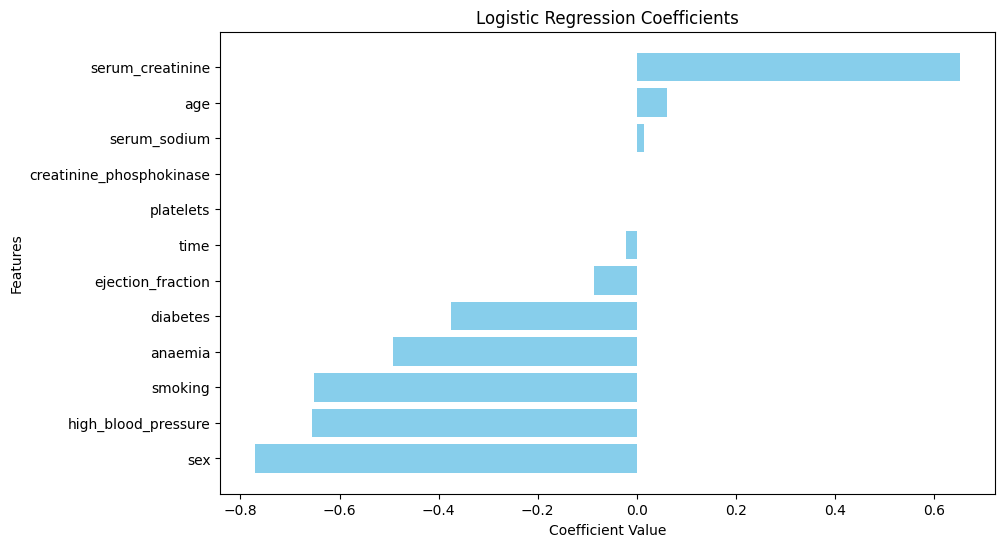

In [8]:
coefficients = logreg.coef_[0]
feature_names = X_resampled.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients:")
print(coef_df)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Logistic Regression Coefficients")
plt.gca().invert_yaxis()
plt.show()

PPV: 0.7692307692307693
Accuracy: 0.8833333333333333
ROC AUC Score: 0.9270186335403727

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60


Feature Importance:
                      Feature  Importance
11                      time    0.348339
7           serum_creatinine    0.149921
4          ejection_fraction    0.127262
0                        age    0.092784
2   creatinine_phosphokinase    0.081539


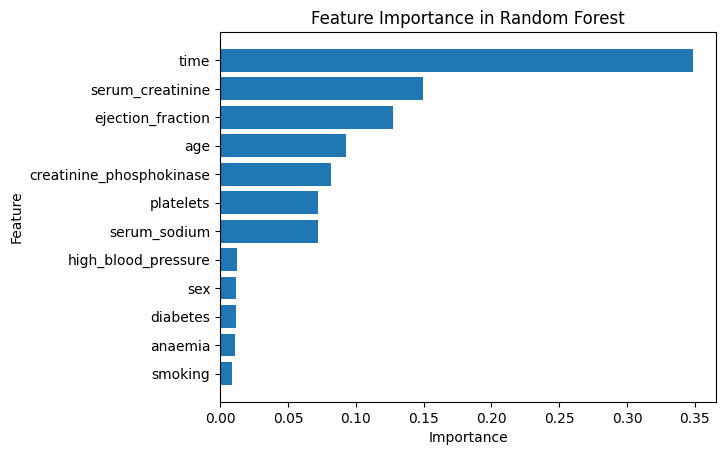

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

ppv_rf = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print("PPV:", ppv_rf)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", importance.head(5))

import matplotlib.pyplot as plt
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
PPV (Neural Network): 0.5625
Accuracy: 0.8
ROC AUC Score: 0.8726708074534162

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        46
           1       0.56      0.64      0.60        14

    accuracy                           0.80        60
   macro avg       0.72      0.75      0.73        60
weighted avg       0.81      0.80      0.80        60



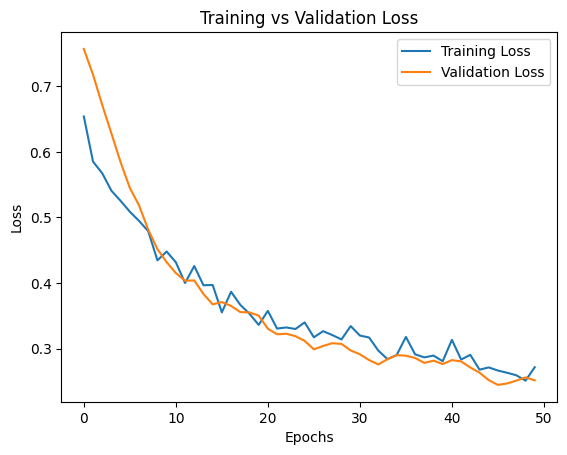

In [ ]:
# Neural Network Model
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_dim=X_resampled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_prob = model.predict(X_test).flatten()
y_pred = (y_prob > 0.5).astype(int)

ppv_nn = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("PPV (Neural Network):", ppv_nn)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()